In [1]:
import random
import torch
from d2l import torch as d2l

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.0494, -0.6814]) 
label: tensor([6.4332])


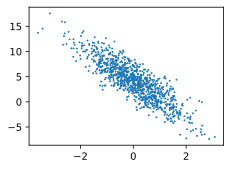

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
      indices[i:min(i+batch_size, num_examples)]
    )
    yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2524,  1.5142],
        [-0.3634,  1.2636],
        [ 1.1975, -0.4468],
        [ 1.3140, -0.6562],
        [ 2.0459,  0.2509],
        [-1.7925, -0.7485],
        [ 0.5808,  0.6266],
        [ 1.0656,  2.3668],
        [-0.5555,  0.2434],
        [-0.4954, -1.0068]]) 
 tensor([[-0.4536],
        [-0.8191],
        [ 8.0942],
        [ 9.0638],
        [ 7.4358],
        [ 3.1356],
        [ 3.2326],
        [-1.7215],
        [ 2.2467],
        [ 6.6290]])


In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = d2l.squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    d2l.sgd([w, b], lr, batch_size)
    with torch.no_grad():
      train_l = loss(net(features, w, b), labels)
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 14.301257
epoch 1, loss 13.716436
epoch 1, loss 12.796153
epoch 1, loss 11.604799
epoch 1, loss 11.043819
epoch 1, loss 9.689009
epoch 1, loss 8.566263
epoch 1, loss 8.232026
epoch 1, loss 7.887794
epoch 1, loss 7.484754
epoch 1, loss 7.170170
epoch 1, loss 6.782466
epoch 1, loss 6.477842
epoch 1, loss 6.171763
epoch 1, loss 6.010988
epoch 1, loss 5.659929
epoch 1, loss 5.445885
epoch 1, loss 5.116398
epoch 1, loss 4.768907
epoch 1, loss 4.474958
epoch 1, loss 4.105267
epoch 1, loss 3.858815
epoch 1, loss 3.723861
epoch 1, loss 3.489688
epoch 1, loss 3.299839
epoch 1, loss 3.168175
epoch 1, loss 2.973208
epoch 1, loss 2.842854
epoch 1, loss 2.696373
epoch 1, loss 2.462780
epoch 1, loss 2.363362
epoch 1, loss 2.279665
epoch 1, loss 2.182010
epoch 1, loss 2.102754
epoch 1, loss 1.945757
epoch 1, loss 1.834436
epoch 1, loss 1.762080
epoch 1, loss 1.667797
epoch 1, loss 1.560276
epoch 1, loss 1.455421
epoch 1, loss 1.354213
epoch 1, loss 1.289964
epoch 1, loss 1.225770
epoch 

In [10]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0003, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)


In [12]:
w, b

(tensor([[ 1.9997],
         [-3.3995]], requires_grad=True),
 tensor([4.1997], requires_grad=True))

In [13]:
true_w, true_b

(tensor([ 2.0000, -3.4000]), 4.2)

In [14]:
torch.matmul?

Docstring:
matmul(input, other, *, out=None) -> Tensor

Matrix product of two tensors.

The behavior depends on the dimensionality of the tensors as follows:

- If both tensors are 1-dimensional, the dot product (scalar) is returned.
- If both arguments are 2-dimensional, the matrix-matrix product is returned.
- If the first argument is 1-dimensional and the second argument is 2-dimensional,
  a 1 is prepended to its dimension for the purpose of the matrix multiply.
  After the matrix multiply, the prepended dimension is removed.
- If the first argument is 2-dimensional and the second argument is 1-dimensional,
  the matrix-vector product is returned.
- If both arguments are at least 1-dimensional and at least one argument is
  N-dimensional (where N > 2), then a batched matrix multiply is returned.  If the first
  argument is 1-dimensional, a 1 is prepended to its dimension for the purpose of the
  batched matrix multiply and removed after.  If the second argument is 1-dimensional, a
